In [836]:
import matplotlib.pyplot
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [871]:
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero*')
velf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/velocity*')

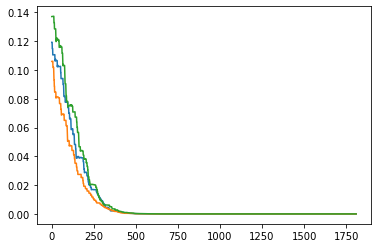

In [872]:
plt.plot(np.loadtxt(hetf[0])[700:,1])
plt.plot(np.loadtxt(hetf[1])[700:,1])
plt.plot(np.loadtxt(hetf[2])[700:,1])

In [873]:
hetf

['/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero_Nb100_migr0.25+_tau50_alpha0.01_ID0_demes200_2021-02-01-08-51-52.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero_Nb100_migr0.25+_tau50_alpha0.003_ID0_demes200_2021-02-01-08-51-11.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero_Nb100_migr0.25+_tau50_alpha0.03_ID0_demes200_2021-02-01-08-51-22.txt']

In [868]:
taus = np.array([50,100,200,500])
Bsims= np.array([25,50,75,100])
alphas= np.array([0.01,0.03])
samps = 100

In [874]:
harr = np.zeros((len(Bsims),len(taus),len(alphas), samps,5000 ))

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        for a, alpha in enumerate(alphas):
            for ID in range(1,samps+1):
                hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/coarse_temp_res/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*ID'+str(ID)+'*')
                arr = np.loadtxt(hetf[0])[:,1]
                harr[B,t,a,ID-1,:len(arr)]=arr
        

In [842]:
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_*ID'+str(ID)+'*')
hx_arr= np.loadtxt(hetf[0])[:,0]

<ipython-input-843-b06d559ea443>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,0,:,:tf]),axis=0)
<ipython-input-843-b06d559ea443>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,0,:,:tf]),axis=0)
<ipython-input-843-b06d559ea443>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,0,:,:tf]),axis=0)
<ipython-input-843-b06d559ea443>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,0,:,:tf]),axis=0)


Text(0.5, 0, 'Time (time steps)')

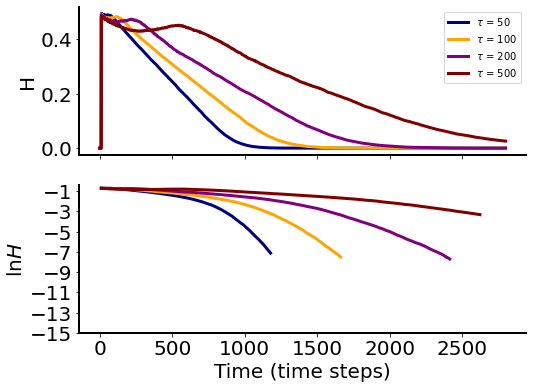

In [843]:
fig,axs = plt.subplots(2,1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']
ax=axs[0]
tf=2800
for i in range(4):
    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.arange(0,tf*1,1),np.mean(harr[1,i,0,:,:tf],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
ax.legend()
ax.set_ylabel('H',fontsize=20)
ax=axs[1]

for i in range(4):
    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    y=np.mean(np.log(harr[1,i,0,:,:tf]),axis=0)
    ax.plot(np.arange(0,tf*1,1)[:len(y)],y,lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.set_yticks(np.arange(-15,0,2))
    
for ax in axs:

    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    #ax.legend()
ax.set_ylabel('$\ln H$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

<ipython-input-849-f17e10cae4f2>:6: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[2,3,0,:,:10000]),axis=0)


Text(0.5, 0, 'Time (time steps)')

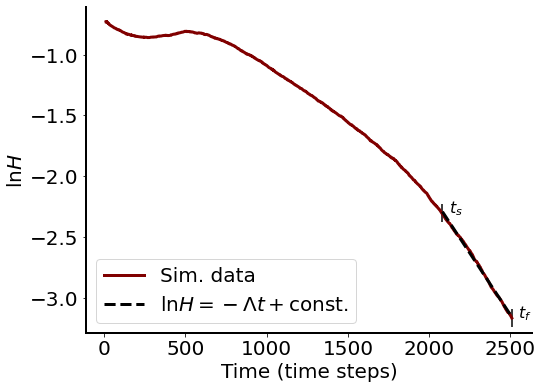

In [849]:
fig,ax = plt.subplots(1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']


    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
y=np.mean(np.log(harr[2,3,0,:,:10000]),axis=0)
x=np.arange(0,10000*1,1)[:len(y)]
ax.plot(x,y,lw=3,c = colors[i],label=r'Sim. data')
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
ax.legend()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

hts=np.log(0.1)
htf=np.log(0.001)
ts=np.argwhere(y>hts)[-1][0]+5
#tf=np.argwhere(y>htf)[-1][0]
tf=np.argwhere(~np.isinf(y))[-1][0]
htf=y[tf]
ax.scatter(x[ts],hts,marker='|',s=350,c='k')
ax.scatter(x[tf],htf,marker='|',s=350,c='k')
ax.text(x[ts]+40,hts,s='$t_s$',fontsize=16)
ax.text(x[tf]+40,htf,s='$t_f$',fontsize=16)
tt=ts+int((tf-ts)/2)
#ax.text(x[tt]+40,y[tt] ,s='$\ln H=-\Lambda t + \mathrm{const.} $',fontsize=16)
lam,c =np.polyfit(x[ts:tf],y[ts:tf],1)
plt.plot(x[ts:tf],lam*x[ts:tf]+c,c='k',linestyle='--',lw=3,label= "$\ln H=-\Lambda t + \mathrm{const.} $")
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)
ax.set_ylabel('$\lnH$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

IndexError: index 1 is out of bounds for axis 2 with size 1

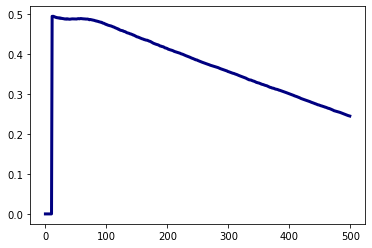

In [850]:
fig,ax = plt.subplots()
colors = ['navy', 'orange', 'purple', 'maroon','grey']
for i in range(4):
    #ax.plot(np.mean(harr[0,i,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.mean(harr[1,i,0,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.mean(harr[1,i,1,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))



for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time (time steps)',fontsize=20)
ax.set_ylabel('H',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend()

In [875]:
data= np.zeros((len(Bsims),len(taus),len(alphas)))

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        for a, alpha in enumerate(alphas):
            #for n in rannge(samp):
            het = np.mean(np.log(harr[B,t,a,:,:]),axis=0)
            ts = np.argwhere(het>np.log(0.1))[-1][0]
            tf =np.argwhere(~np.isinf(het))[-1][0]
            data[B,t,a] = -np.polyfit(hx_arr[ts:tf]-50000,het[ts:tf],1)[0]
            print(B,t,a,ts,tf,data[B,t,a])


            

0 0 0 46 66 0.23019666345232878
0 0 1 46 67 0.22234503292649707
1 0 0 46 69 0.2484011040186046
1 0 1 47 68 0.21941918525269286
2 0 0 46 72 0.252075592650137
2 0 1 47 73 0.2411796789122094
3 0 0 46 70 0.2346698003314422
3 0 1 48 72 0.23834185589021836
0 1 0 59 92 0.16132376828908662
0 1 1 59 88 0.1425562400482817
1 1 0 58 93 0.16609353246450048
1 1 1 59 92 0.15303745078385128
2 1 0 58 91 0.1590555999430107
2 1 1 60 96 0.15811522119706886
3 1 0 58 96 0.165151112058604
3 1 1 61 102 0.1603597307830179
0 2 0 78 121 0.09532940472209012
0 2 1 79 126 0.09422967560140146
1 2 0 76 129 0.10536914590746937
1 2 1 77 130 0.10037942154261159
2 2 0 75 126 0.10193249294463151
2 2 1 77 127 0.09429203642187999
3 2 0 75 131 0.10655617112135758
3 2 1 77 136 0.09916766458810732
0 3 0 116 196 0.050463294286506775
0 3 1 119 184 0.04467128001270957
1 3 0 113 207 0.05523917704020639
1 3 1 114 203 0.049167458310720634
2 3 0 111 199 0.05505357735336548
2 3 1 113 198 0.04805231442930071
3 3 0 109 206 0.05497585948

<ipython-input-875-6294ff71d838>:7: RuntimeWarning: divide by zero encountered in log
  het = np.mean(np.log(harr[B,t,a,:,:]),axis=0)


In [857]:
data[:,2]

array([[0.00477032],
       [0.0050877 ],
       [0.00483141],
       [0.00498865]])

<ipython-input-858-953012e382d9>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(harr[0,3,0],axis=0))[2426:2709])


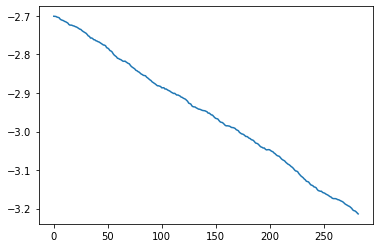

In [858]:
plt.plot(np.log(np.mean(harr[0,3,0],axis=0))[2426:2709])

Text(0, 0.5, '$1/\\Lambda$ ')

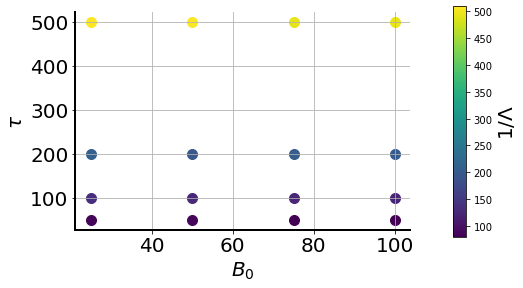

In [861]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        #im= plt.scatter(Bsim/150,(tau*.01/Bsim)*150, c = 1/data[B,t,0],cmap=colormap,norm=normalize)
        im= ax.scatter(Bsim,(tau), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$ \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

Text(0, 0.5, '$1/\\Lambda$ ')

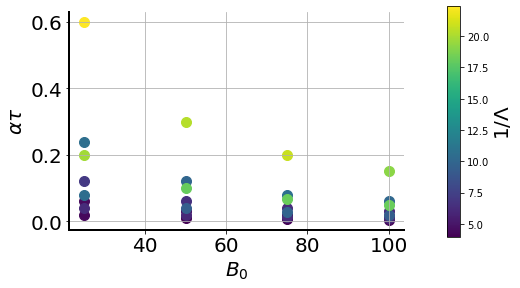

In [878]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

Text(0, 0.5, '$1/\\Lambda$ ')

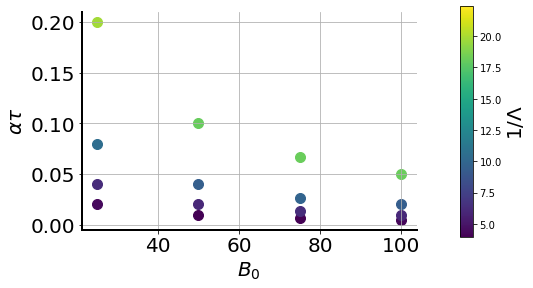

In [880]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        #im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

Text(0, 0.5, '$1/\\Lambda$ ')

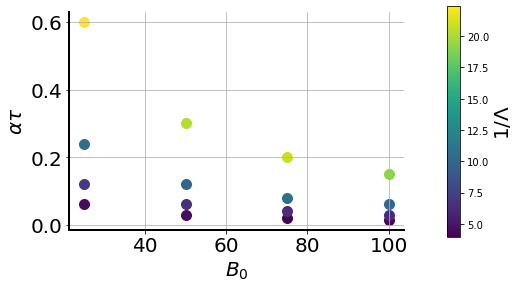

In [881]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        #im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

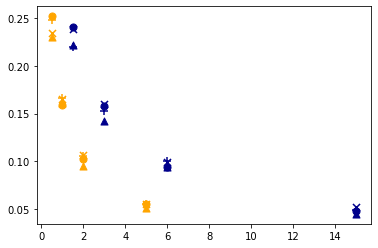

In [907]:
markers=["^","+","o","x"]
for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        #im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        plt.scatter(tau*0.03,data[B,t,1],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='darkblue')
        plt.scatter(tau*0.01,data[B,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='orange')
        #plt.scatter(tau*Bsim*.01,1/data[B,t,1],cmap=colormap,norm=normalize,s=100)